In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ws data/stats_data_per_season.csv')
num_df = df.drop(['league', 'year', 'playerId', 'name', 'Unnamed: 2', 'dribledPast'], axis = 1)

In [3]:
pg_df = num_df.copy()
for feature in list(pg_df):
    if feature not in ['action', 'subedOn', 'gamesPlayed']:
        pg_df[feature] /= pg_df.gamesPlayed

In [4]:
corr_matrix1 = abs(num_df.corr().round(1))
corr_matrix2 = abs(pg_df.corr().round(1))

In [5]:
mask = np.zeros_like(corr_matrix1)
mask[np.triu_indices_from(mask)] = True
corr_matrix = mask * corr_matrix1 + ((mask * corr_matrix1) == 0) * corr_matrix2
corr_matrix

,gamesPlayed,subedOn,goalsScored,assists,yellow,red,shots,passes,passesSuccess,aerialsWon,...,keyPasses,dribbles,offsides,dispossessed,badTouch,crosses,longBalls,throughBalls,MotM,rating
gamesPlayed,1.0,0.4,0.5,0.5,0.7,0.2,0.7,0.9,0.8,0.6,...,0.7,0.6,0.4,0.7,0.7,0.5,0.6,0.4,0.5,1.0
subedOn,0.4,1.0,0.2,0.2,0.1,0.0,0.3,0.4,0.4,0.1,...,0.2,0.3,0.3,0.3,0.3,0.2,0.1,0.1,0.1,0.3
goalsScored,0.2,0.1,1.0,0.5,0.3,0.1,0.8,0.3,0.3,0.4,...,0.6,0.6,0.7,0.7,0.7,0.3,0.2,0.4,0.7,0.5
assists,0.2,0.0,0.3,1.0,0.3,0.1,0.6,0.5,0.5,0.2,...,0.8,0.6,0.4,0.6,0.6,0.7,0.2,0.5,0.5,0.5
yellow,0.1,0.1,0.0,0.0,1.0,0.2,0.4,0.7,0.7,0.5,...,0.4,0.4,0.2,0.4,0.4,0.4,0.4,0.3,0.3,0.7
red,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.2,0.2,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2
shots,0.2,0.1,0.6,0.3,0.0,0.0,1.0,0.5,0.5,0.4,...,0.8,0.7,0.7,0.8,0.8,0.6,0.1,0.5,0.6,0.7
passes,0.3,0.4,0.0,0.1,0.2,0.0,0.0,1.0,1.0,0.6,...,0.7,0.5,0.2,0.5,0.5,0.6,0.7,0.4,0.5,0.9
passesSuccess,0.2,0.4,0.0,0.1,0.2,0.0,0.0,1.0,1.0,0.5,...,0.6,0.5,0.1,0.5,0.5,0.5,0.6,0.4,0.4,0.8
aerialsWon,0.2,0.1,0.1,0.0,0.2,0.0,0.1,0.3,0.2,1.0,...,0.3,0.2,0.3,0.3,0.4,0.1,0.3,0.1,0.4,0.6


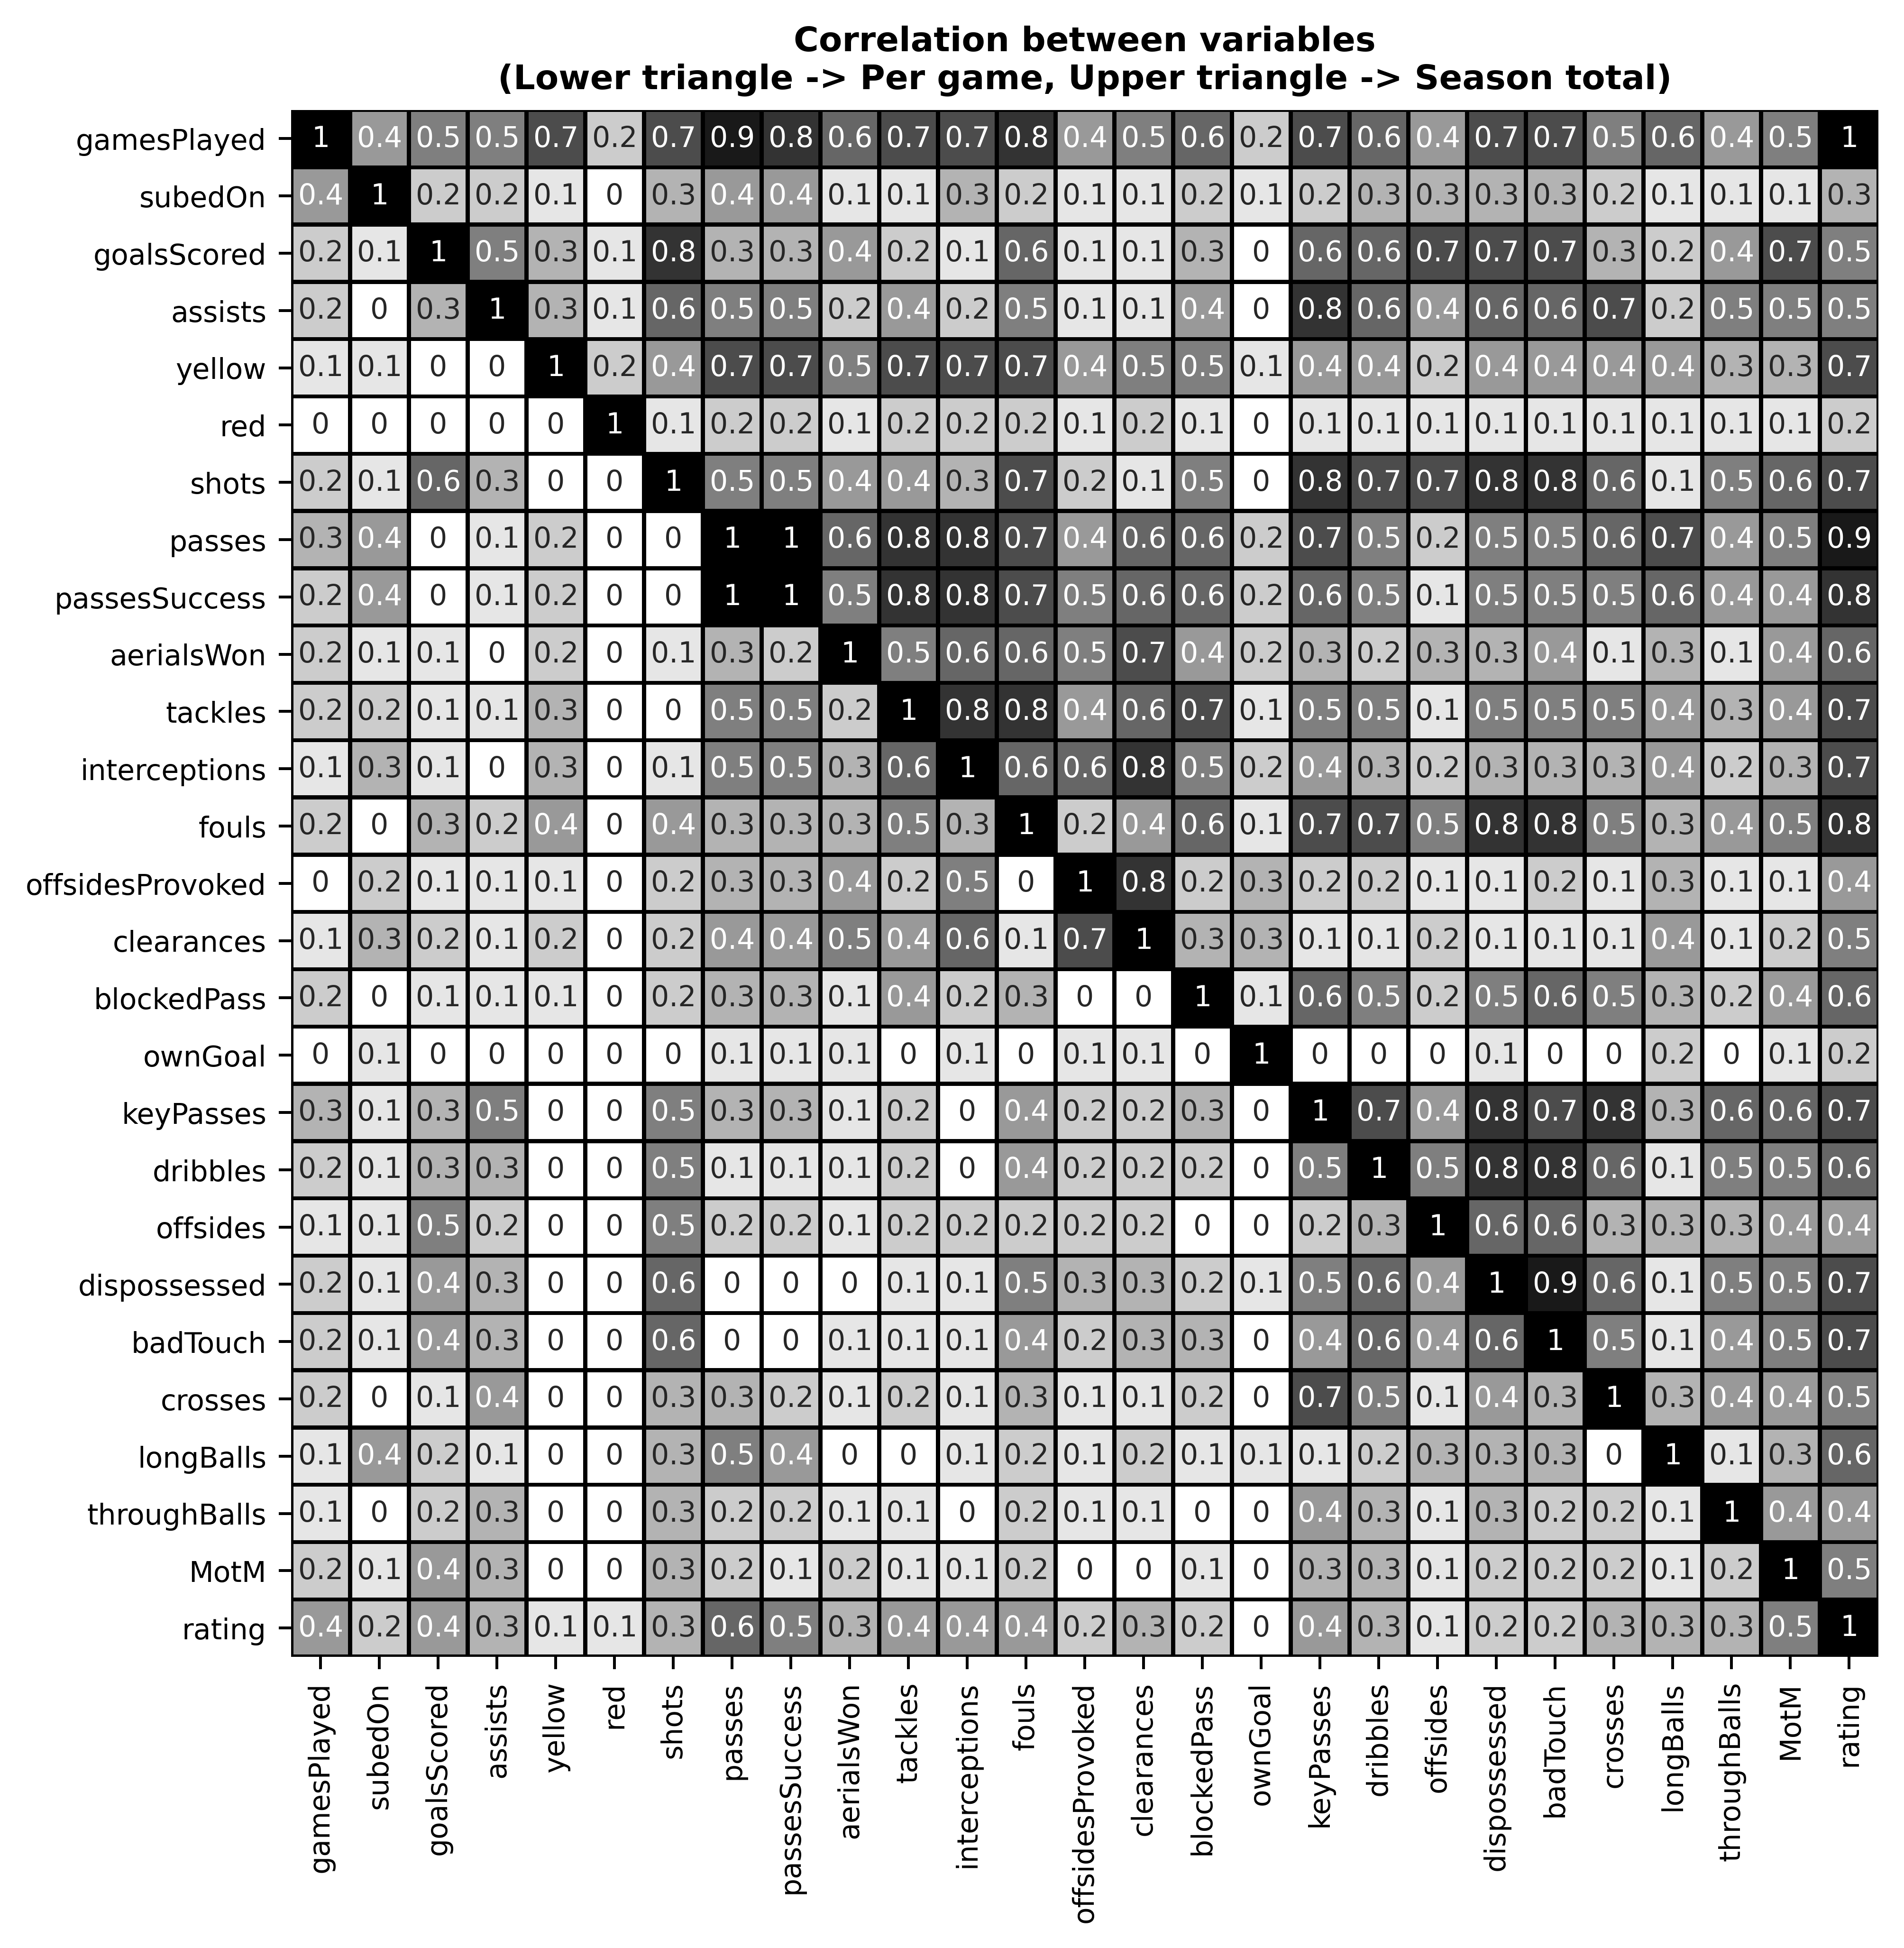

In [6]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 540
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 8

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

plt.title('Correlation between variables\n(Lower triangle -> Per game, Upper triangle -> Season total)', fontweight='bold')
sns.heatmap(corr_matrix, cmap='binary', vmin=0, vmax=1, linewidths=1, linecolor='black', annot = True, cbar = False);

plt.savefig('img/002-1CorrMatrix.eps', format='eps', bbox_inches='tight')